<a href="https://colab.research.google.com/github/Rohit-Singh12/Deep-LEARGNINGS/blob/main/Misc/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install torch_geometric

In [33]:
from torch_geometric.datasets import KarateClub

In [34]:
dataset = KarateClub()

In [35]:
dataset.num_classes

4

In [36]:
dataset.num_features

34

In [37]:
graph = dataset[0]

In [38]:
graph

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [39]:
graph.edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3,  0,  2, 30, 32, 33,  2, 33,  0,  4

In [40]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import torch

In [41]:
G = to_networkx(graph, to_undirected=True)

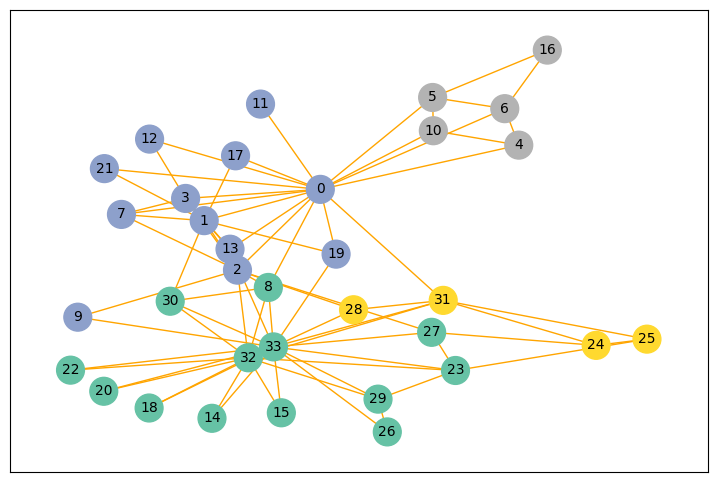

In [42]:
plt.figure(figsize=(9,6))
nx.draw_networkx(
    G,
    pos=nx.spring_layout(G, seed=42),
    node_size=400,
    node_color=graph.y,
    cmap="Set2",
    edge_color="orange",
    font_size=10,
    font_color = "black"
)
plt.show()

In [43]:
graph.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [44]:
graph.train_mask.sum()

tensor(4)

In [45]:
graph.is_directed()

False

In [46]:
graph.has_self_loops()

False

In [47]:
graph.has_isolated_nodes()

False

In [48]:
import torch.nn as nn
import torch_geometric.nn as tgnn

class GraphNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.gcn = tgnn.GCNConv(34, 10)
    self.fc1 = nn.Linear(10, 4)

  def forward(self, x, edge_index):
    hidden = self.gcn(x, edge_index)
    output = torch.relu(self.fc1(hidden))
    return hidden, output

In [49]:
model = GraphNetwork()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [50]:
from sklearn.metrics import accuracy_score
epochs_outputs = []

for epoch in range(100):
  optimizer.zero_grad()
  hidden, output = model(graph.x, graph.edge_index)
  loss = criterion(output, graph.y)
  acc = accuracy_score(output.argmax(dim=1),graph.y)
  loss.backward()
  optimizer.step()
  epochs_outputs.append(output.argmax(dim=1))
  if (epoch == 0) or (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch 1 | Loss: 1.39 | Acc: 32.35%
Epoch 10 | Loss: 1.38 | Acc: 35.29%
Epoch 20 | Loss: 1.36 | Acc: 35.29%
Epoch 30 | Loss: 1.35 | Acc: 35.29%
Epoch 40 | Loss: 1.34 | Acc: 35.29%
Epoch 50 | Loss: 1.33 | Acc: 35.29%
Epoch 60 | Loss: 1.32 | Acc: 35.29%
Epoch 70 | Loss: 1.31 | Acc: 35.29%
Epoch 80 | Loss: 1.29 | Acc: 35.29%
Epoch 90 | Loss: 1.28 | Acc: 35.29%
Epoch 100 | Loss: 1.27 | Acc: 41.18%


In [51]:
graph.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [52]:
from torch_geometric.datasets import CoraFull

In [53]:
dataset = CoraFull(root='./')

Processing...
Done!


In [54]:
len(dataset)

1

In [55]:
graph = dataset[0]

In [59]:
graph

Data(x=[19793, 8710], edge_index=[2, 126842], y=[19793])

In [61]:
dataset.num_classes

70

In [63]:
import torch
import torch.nn as nn
import torch_geometric.nn as tgnn

In [72]:
class GCNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()
    self.gcn1 = tgnn.GCNConv(input_dim, hidden_dim)
    self.gcn2 = tgnn.GCNConv(hidden_dim, hidden_dim)
    self.fc1 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x, edge_index):
    hidden = torch.relu(self.gcn1(x, edge_index))
    hidden = torch.relu(self.gcn2(hidden, edge_index))
    output = self.fc1(hidden)
    return hidden, output



In [83]:
class GATModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, heads):
    super().__init__()
    self.gcn1 = tgnn.GATConv(input_dim, hidden_dim, heads=heads)
    self.gcn2 = tgnn.GATConv(hidden_dim*heads, hidden_dim, heads=heads)
    self.fc1 = nn.Linear(hidden_dim*heads, output_dim)

  def forward(self, x, edge_index):
    hidden = torch.relu(self.gcn1(x, edge_index))
    hidden = torch.relu(self.gcn2(hidden, edge_index))
    output = self.fc1(hidden)

    return hidden, output



In [80]:
class GATv2Model(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, heads):
    super().__init__()
    self.gcn1 = tgnn.GATv2Conv(input_dim, hidden_dim, heads=heads)
    self.gcn2 = tgnn.GATv2Conv(hidden_dim*heads, hidden_dim, heads=heads)
    self.fc1 = nn.Linear(hidden_dim*heads, output_dim)

  def forward(self, x, edge_index):
    hidden = torch.relu(self.gcn1(x, edge_index))
    hidden = torch.relu(self.gcn2(hidden, edge_index))
    output = self.fc1(hidden)

    return hidden, output

In [81]:
from sklearn.metrics import accuracy_score
def train_model(model, graph, optimizer, criterion, epochs):
  for epoch in range(epochs):
    optimizer.zero_grad()
    hidden, output = model(graph.x, graph.edge_index)
    loss = criterion(output, graph.y)
    acc = accuracy_score(output.argmax(dim=1), graph.y)
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

In [76]:
graph

Data(x=[19793, 8710], edge_index=[2, 126842], y=[19793])

In [77]:
from time import time
model = GCNModel(dataset.num_features, 100, dataset.num_classes)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

start = time()
train_model(model, graph, optimizer, criterion, 30)
print(f"Training time = {time()-start}")

Epoch 1 | Loss: 4.25 | Acc: 1.83%
Epoch 2 | Loss: 4.16 | Acc: 10.49%
Epoch 3 | Loss: 4.02 | Acc: 10.97%
Epoch 4 | Loss: 3.88 | Acc: 10.52%
Epoch 5 | Loss: 3.77 | Acc: 11.02%
Epoch 6 | Loss: 3.61 | Acc: 18.82%
Epoch 7 | Loss: 3.45 | Acc: 24.78%
Epoch 8 | Loss: 3.29 | Acc: 35.30%
Epoch 9 | Loss: 3.11 | Acc: 40.01%
Epoch 10 | Loss: 2.92 | Acc: 43.16%
Epoch 11 | Loss: 2.72 | Acc: 46.08%
Epoch 12 | Loss: 2.53 | Acc: 49.30%
Epoch 13 | Loss: 2.34 | Acc: 52.79%
Epoch 14 | Loss: 2.16 | Acc: 55.88%
Epoch 15 | Loss: 1.99 | Acc: 57.99%
Epoch 16 | Loss: 1.84 | Acc: 60.54%
Epoch 17 | Loss: 1.70 | Acc: 62.35%
Epoch 18 | Loss: 1.58 | Acc: 63.48%
Epoch 19 | Loss: 1.48 | Acc: 64.76%
Epoch 20 | Loss: 1.39 | Acc: 65.89%
Epoch 21 | Loss: 1.30 | Acc: 67.47%
Epoch 22 | Loss: 1.23 | Acc: 68.57%
Epoch 23 | Loss: 1.18 | Acc: 69.48%
Epoch 24 | Loss: 1.13 | Acc: 70.51%
Epoch 25 | Loss: 1.07 | Acc: 71.45%
Epoch 26 | Loss: 1.03 | Acc: 72.46%
Epoch 27 | Loss: 0.99 | Acc: 73.13%
Epoch 28 | Loss: 0.96 | Acc: 73.94%
Ep

In [84]:
model = GATModel(dataset.num_features, 100, dataset.num_classes, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

start = time()
train_model(model, graph, optimizer, criterion, 30)
print(f"Training time = {time()-start}")

Epoch 1 | Loss: 4.25 | Acc: 0.81%
Epoch 2 | Loss: 4.04 | Acc: 6.85%
Epoch 3 | Loss: 4.13 | Acc: 7.90%
Epoch 4 | Loss: 3.69 | Acc: 17.63%
Epoch 5 | Loss: 3.64 | Acc: 20.54%
Epoch 6 | Loss: 3.44 | Acc: 27.53%
Epoch 7 | Loss: 3.13 | Acc: 31.74%
Epoch 8 | Loss: 2.79 | Acc: 40.32%
Epoch 9 | Loss: 2.48 | Acc: 44.66%
Epoch 10 | Loss: 2.20 | Acc: 50.07%
Epoch 11 | Loss: 1.92 | Acc: 57.98%
Epoch 12 | Loss: 1.73 | Acc: 58.60%
Epoch 13 | Loss: 1.55 | Acc: 61.32%
Epoch 14 | Loss: 1.42 | Acc: 64.08%
Epoch 15 | Loss: 1.30 | Acc: 65.95%
Epoch 16 | Loss: 1.22 | Acc: 67.02%
Epoch 17 | Loss: 1.14 | Acc: 68.92%
Epoch 18 | Loss: 1.06 | Acc: 70.72%
Epoch 19 | Loss: 0.99 | Acc: 72.57%
Epoch 20 | Loss: 0.93 | Acc: 73.97%
Epoch 21 | Loss: 0.87 | Acc: 75.38%
Epoch 22 | Loss: 0.80 | Acc: 76.54%
Epoch 23 | Loss: 0.76 | Acc: 77.49%
Epoch 24 | Loss: 0.70 | Acc: 78.58%
Epoch 25 | Loss: 0.66 | Acc: 79.61%
Epoch 26 | Loss: 0.62 | Acc: 80.99%
Epoch 27 | Loss: 0.58 | Acc: 81.90%
Epoch 28 | Loss: 0.54 | Acc: 82.83%
Epoc

In [85]:
model = GATv2Model(dataset.num_features, 100, dataset.num_classes, 4)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

start = time()
train_model(model, graph, optimizer, criterion, 30)
print(f"Training time = {time()-start}")

Epoch 1 | Loss: 4.25 | Acc: 0.79%
Epoch 2 | Loss: 4.03 | Acc: 6.68%
Epoch 3 | Loss: 4.01 | Acc: 4.86%
Epoch 4 | Loss: 3.63 | Acc: 24.86%
Epoch 5 | Loss: 3.49 | Acc: 32.50%
Epoch 6 | Loss: 3.19 | Acc: 35.06%
Epoch 7 | Loss: 2.84 | Acc: 37.73%
Epoch 8 | Loss: 2.50 | Acc: 45.13%
Epoch 9 | Loss: 2.18 | Acc: 52.16%
Epoch 10 | Loss: 1.90 | Acc: 56.59%
Epoch 11 | Loss: 1.69 | Acc: 60.54%
Epoch 12 | Loss: 1.53 | Acc: 63.55%
Epoch 13 | Loss: 1.36 | Acc: 65.24%
Epoch 14 | Loss: 1.27 | Acc: 66.95%
Epoch 15 | Loss: 1.19 | Acc: 68.26%
Epoch 16 | Loss: 1.08 | Acc: 70.50%
Epoch 17 | Loss: 1.01 | Acc: 72.43%
Epoch 18 | Loss: 0.93 | Acc: 74.05%
Epoch 19 | Loss: 0.86 | Acc: 75.61%
Epoch 20 | Loss: 0.79 | Acc: 77.12%
Epoch 21 | Loss: 0.74 | Acc: 78.42%
Epoch 22 | Loss: 0.69 | Acc: 79.62%
Epoch 23 | Loss: 0.64 | Acc: 80.70%
Epoch 24 | Loss: 0.58 | Acc: 82.32%
Epoch 25 | Loss: 0.54 | Acc: 83.24%
Epoch 26 | Loss: 0.50 | Acc: 84.31%
Epoch 27 | Loss: 0.46 | Acc: 85.23%
Epoch 28 | Loss: 0.42 | Acc: 86.27%
Epoc